In [8]:
from ctf import functions2d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import gridspec

matplotlib.rcParams['figure.dpi'] = 100

# Defining the functions

The code is from https://github.com/lukemarris/ctf

In [45]:
def minimize_callable(x):
    return fun.cost(x)

# functions
functions = ['Ackley', # Many Local Minima
             'Bukin6',
             'CrossInTray',
             'DropWave',
             'Eggholder',
             'Griewank',
             'HolderTable',
             'Levy13',
             'Rastrigin',
             'Schaffer2',
             'Schaffer4',
             'Schwefel',
             'Shubert', # Bowl Shaped
             'Bohachevsky1',
             'Bohachevsky2',
             'Bohachevsky3',
             'Perm',
             'RotatedHyperEllipsoid',
             'Sphere',
             'SumOfDifferentPowers',
             'SumSquares',
             'Trid', # Plate-Shaped
             'Booth',
             'Matyas',
             'McCormick',
             'PowerSum',
             'Zakharov', # Valley-Shaped
             'ThreeHumpCamel',
             'SixHumpCamel',
             'DixonPrice',
             'Rosenbrock',
             'Absolute', # Steep Ridges/Drops
             'AbsoluteSkewed',
             'DeJong5',
             'Easom',
             'Michalewicz', # Other
             'Beale',
             'Branin',
             'GoldsteinPrice',
             'StyblinskiTang']

#fun = functions2d.Rosenbrock()

# Plotting the functions

Below we plot the contours of different 2D functions used in the project.

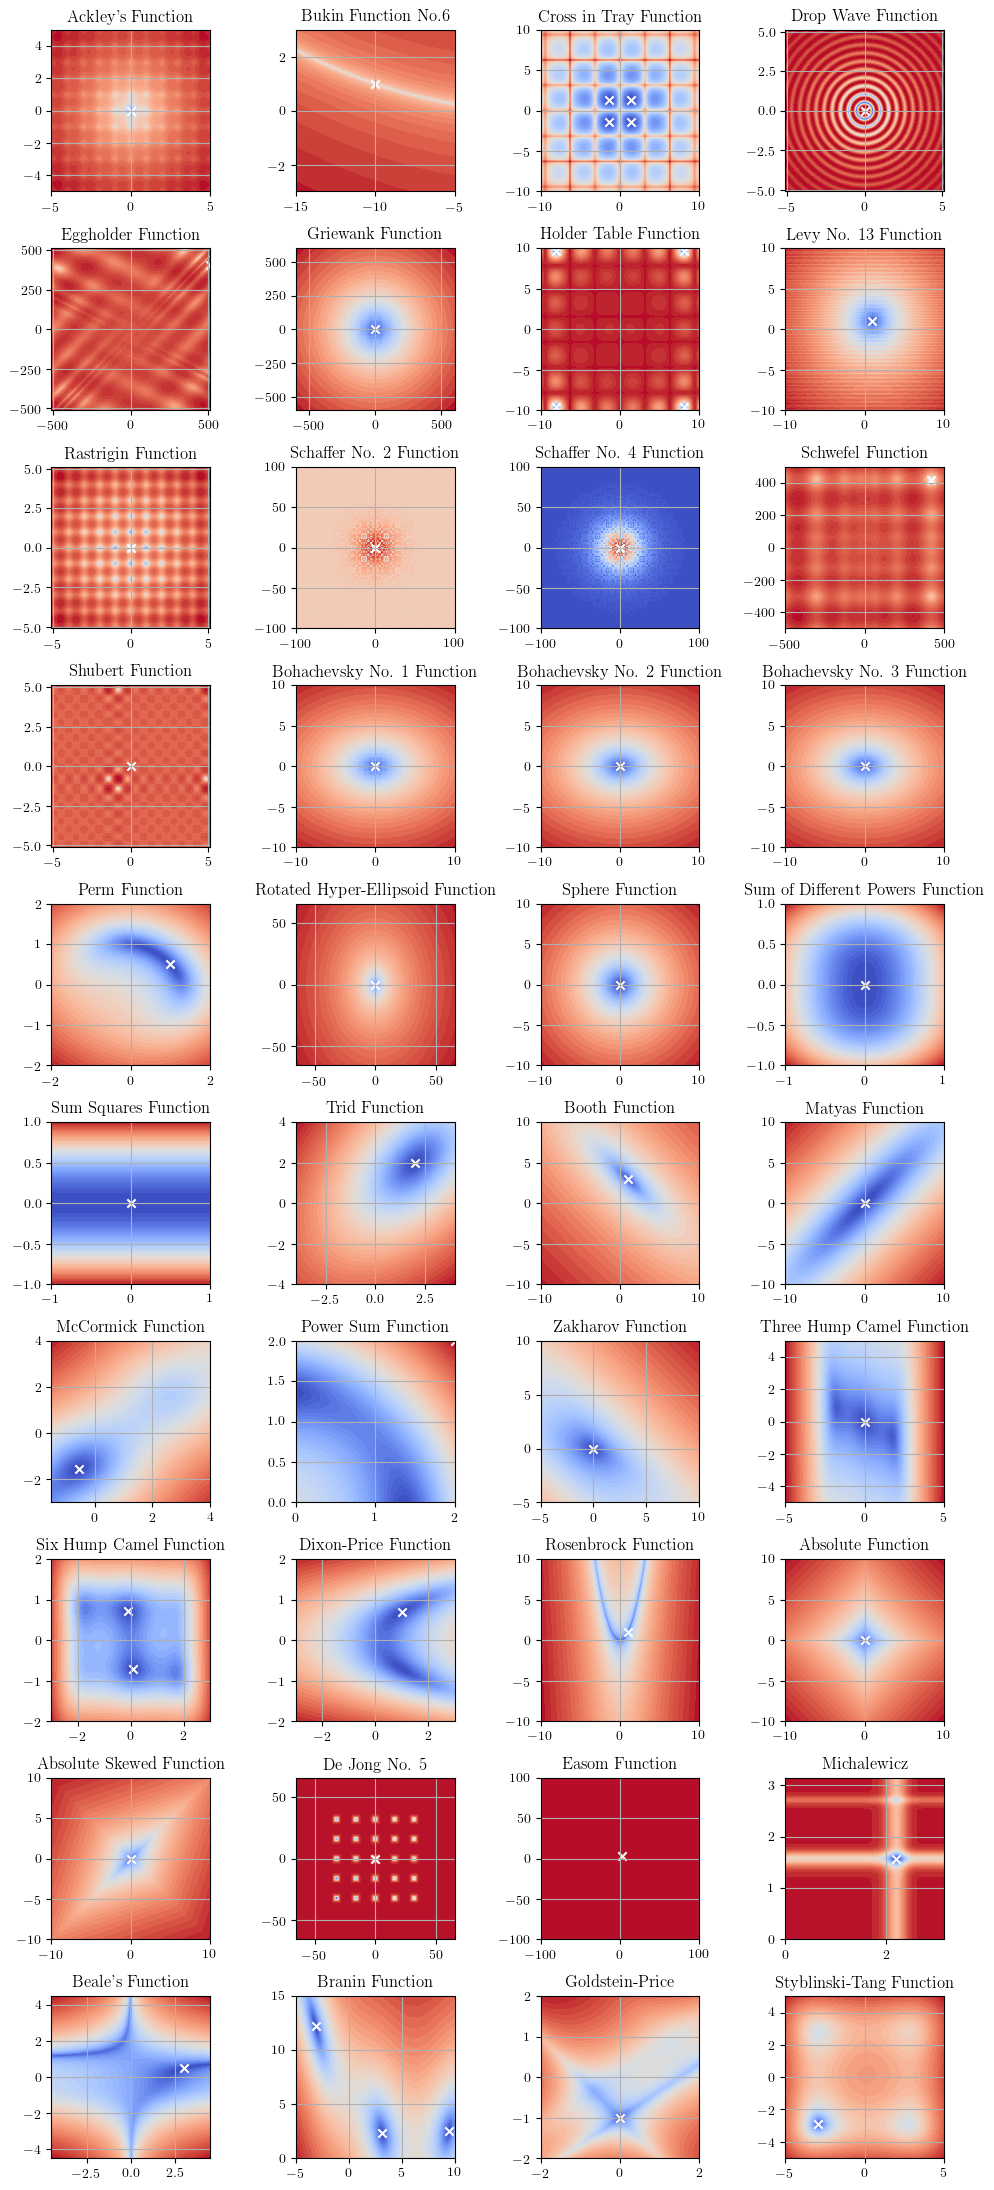

In [58]:
rows = 10
cols = 4
fig = plt.figure(figsize=(10, 22))
gs = gridspec.GridSpec(rows, cols)

row = 0
col = 0
for i in range( len(functions) ):
    target_fun = getattr(functions2d, functions[i])
    fun = target_fun()
    
    """ Plots the cost contour plot over the domain of the function. """
    ax = fig.add_subplot(gs[row, col])
    # Latex
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    ## Domain Correction
    # Lower x0 Limit
    if np.isfinite(fun.domain[0][0]):
        x0_lim_lower = fun.domain[0][0]
    else:
        x0_lim_lower = -10.0
    # Upper x0 Limit
    if np.isfinite(fun.domain[0][1]):
        x0_lim_upper = fun.domain[0][1]
    else:
        x0_lim_upper = +10.0
    # Lower x1 Limit
    if np.isfinite(fun.domain[1][0]):
        x1_lim_lower = fun.domain[1][0]
    else:
        x1_lim_lower = -10.0
    # Upper x1 Limit
    if np.isfinite(fun.domain[1][1]):
        x1_lim_upper = fun.domain[1][1]
    else:
        x1_lim_upper = +10.0
    
    ## Lines
    points = 200
    x0 = np.linspace(x0_lim_lower, x0_lim_upper, points)
    x1 = np.linspace(x1_lim_lower, x1_lim_upper, points)
    ## Meshes
    X0, X1 = np.meshgrid(x0, x1)
    ## Combined
    X = np.array([X0, X1])
    
    ## Calculate Costs
    cost = fun.cost(X)
    ## Renormalise
    cost_norm = np.log(cost - np.min(cost) + 1)
    
    ## Plot
    ax.contourf(X0, X1, cost_norm, 50, cmap=plt.cm.coolwarm)
    plt.scatter(fun.min[..., 0], fun.min[..., 1], c='w', marker='x')
    plt.grid()
#     plt.title(fun.latex_name + "\n" + fun.latex_cost)
    plt.title(fun.latex_name)
    plt.subplots_adjust(top=0.8)
    plt.xlim([x0_lim_lower, x0_lim_upper])
    plt.ylim([x1_lim_lower, x1_lim_upper])
        
    col = np.mod(col+1, cols)
    if col == 0:
        row = np.mod(row+1, rows)

plt.tight_layout()
plt.show()

# Optimization Algorithms



## Robustness

## Efficiency

## Accuracy